In [1]:
import numpy as np         # Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
gas_data= pd.read_csv('gas_turbines.csv')  # loading Dataset
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


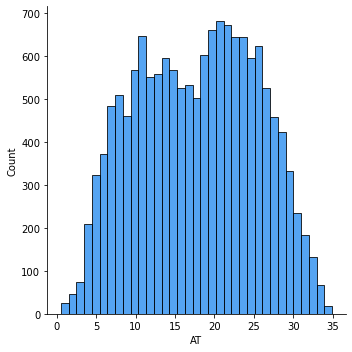

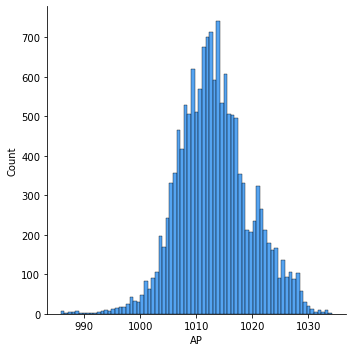

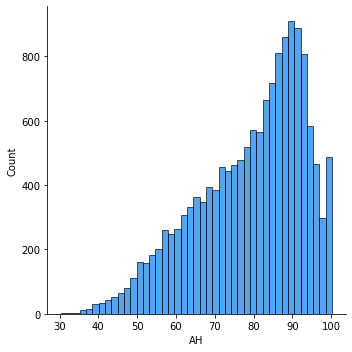

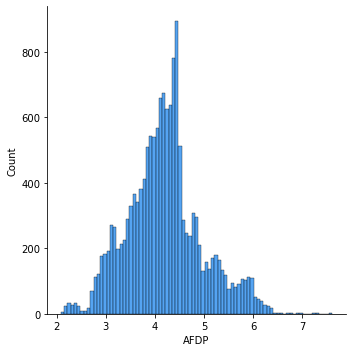

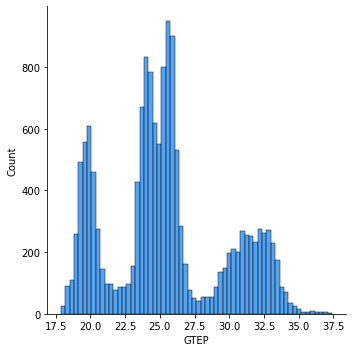

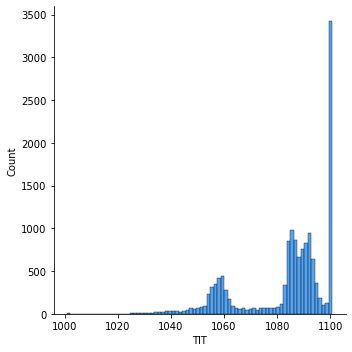

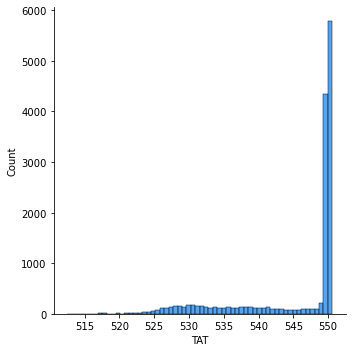

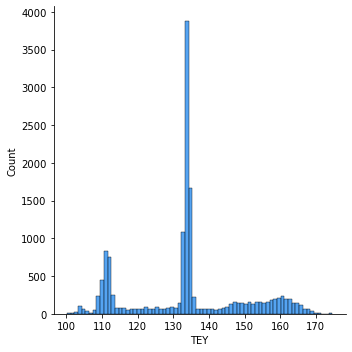

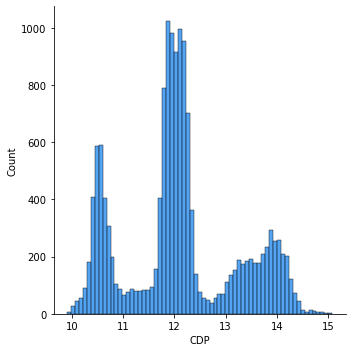

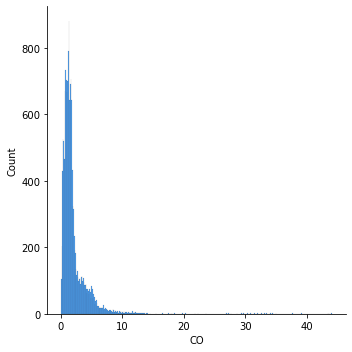

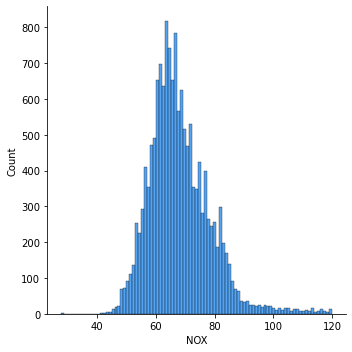

In [3]:
for i in gas_data.columns:
    sns.displot(x=i,data=gas_data,color='#1C86EE');

In [4]:
corr = gas_data.corr()

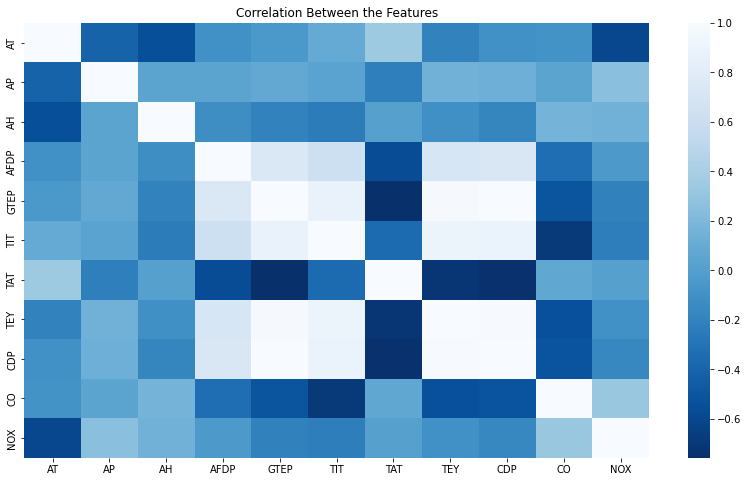

In [5]:
plt.figure(figsize=(14,8))
plt.title('Correlation Between the Features')
sns.heatmap(corr,cmap='Blues_r');

In [6]:
corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [7]:
X= gas_data.drop('TEY',axis=1)
Y=gas_data['TEY']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [8]:
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [9]:
'''def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(X, Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))'''


"def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):\n    model = Sequential()\n    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(1,activation = 'linear'))\n    \n    adam=adam_v2.Adam(learning_rate = learning_rate)\n    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])\n    return model\n\n# Create the model\n\nmodel = KerasClassifier(build_fn = create_model,verbose = 0)\n\n# Define the grid search parameters\n\nbatch_size = [20,40]\nepochs = [50,100]\nlearning_rate = [0.01,0.1]\ndropout_rate = [0.1,0.2]\nactivation_function = ['relu','linear']\ninit = ['uniform','normal']\nneuron1 = [4,8]\nneuron2 = [2,4]\n\n# Make a dictionary of the grid search parameters\n\nparam

In [10]:
#Neural Network Model
model = Sequential()
model.add(Dense(4,input_dim=10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
adam=adam_v2.Adam(learning_rate = 0.01)

model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])
h=model.fit(X_train, Y_train,epochs=50, batch_size=20)

Epoch 1/50
602/602 [==============================] - 1s 995us/step - loss: 18169.8887 - mse: 18169.8887
Epoch 2/50
602/602 [==============================] - 1s 1ms/step - loss: 18009.3711 - mse: 18009.3711
Epoch 3/50
602/602 [==============================] - 1s 1ms/step - loss: 17849.9219 - mse: 17849.9219
Epoch 4/50
602/602 [==============================] - 1s 948us/step - loss: 17691.3984 - mse: 17691.3984
Epoch 5/50
602/602 [==============================] - 1s 1ms/step - loss: 17533.6543 - mse: 17533.6543
Epoch 6/50
602/602 [==============================] - 1s 845us/step - loss: 17376.7891 - mse: 17376.7891
Epoch 7/50
602/602 [==============================] - 1s 888us/step - loss: 17220.6953 - mse: 17220.6953
Epoch 8/50
602/602 [==============================] - 1s 945us/step - loss: 17065.3711 - mse: 17065.3711
Epoch 9/50
602/602 [==============================] - 1s 1ms/step - loss: 16910.8145 - mse: 16910.8145
Epoch 10/50
602/602 [==============================] - 1s 1ms/s

In [11]:
score = model.evaluate(X,Y)
print(model.metrics_names[1],score[1])

470/470 [==============================] - 1s 895us/step - loss: 11136.8184 - mse: 11136.8184
mse 11136.818359375


In [12]:
pred=model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error
mae = mean_squared_error(pred,Y_test)
mae

11157.81910705696

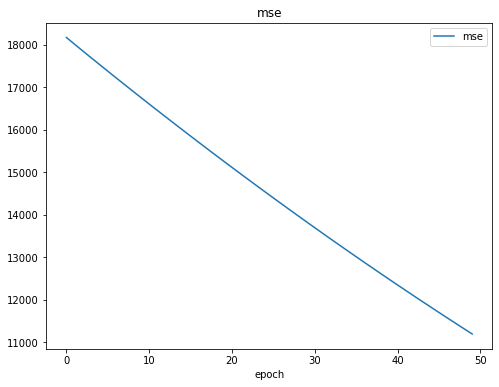

In [14]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(h.history['mse'])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['mse']);

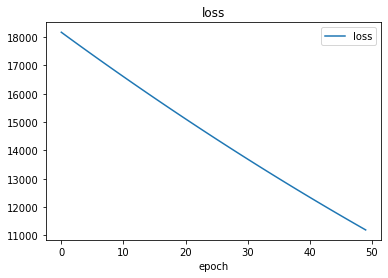

In [15]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss']);